<a href="https://colab.research.google.com/github/NieciaS/Worst_Colleges_Project/blob/main/ProjectCollege_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US College Analysis

#Abstract
Colleges and universities are integral to shaping the educational landscape, promoting academic excellence, and driving societal innovation. Recognizing their significance, the College Dataset offers a comprehensive compilation of data related to these higher education institutions. This dataset serves as a valuable resource for researchers, educators, and policymakers, enabling them to explore and comprehend the multifaceted aspects of higher education.

In light of this, we pose the following questions: "What insights can we derive from this dataset about the diverse colleges and universities, their characteristics, and academic performance?" Additionally, we inquire about institutions exhibiting both high acceptance rates and a significant percentage of students ranking in the top 10% of their high school class, and whether common characteristics emerge among them.

To address these questions, we will analyze a US college dataset stored in CSV format. Our objective is to identify the most promising schools, make comparisons among colleges, and determine which institutions hold the most potential in the United States.



Colleges and universities play a vital role in shaping the educational landscape, fostering academic excellence, and driving societal innovation. Recognizing their importance, the College Dataset provides a comprehensive compilation of data concerning these higher education institutions. This dataset serves as a valuable resource for researchers, educators, and policymakers, offering them the opportunity to explore and understand the diverse aspects of higher education.

In consideration of this, we pose a specific question: "Which colleges should be regarded as the least favorable to attend?"

To address this question, we will analyze a US college dataset stored in CSV format. Our objective is to shed light on institutions that may face challenges, assisting in the determination of which colleges might be perceived as having less potential or being less favorable for students in the United States. This analysis aims to contribute valuable insights for individuals making decisions about higher education options.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Load and Read dataset

In [ ]:
#load the dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/College_Data.csv")
df

,Colleges,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Perc.Alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Verify missing values

In [ ]:
df.isna()

,Colleges,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Perc.Alumni,Expend,Grad.Rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
775,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Checking data types of the columns

In [ ]:
df.dtypes

Colleges        object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
Perc.Alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [ ]:
df['PhD'] = df['PhD'].astype(float)
df.dtypes

Colleges                           object
Private                            object
Apps                                int64
Accept                              int64
Acceptance Rate                   float64
Enroll                              int64
Top 10per new students from HS      int64
F.Undergrad                         int64
P.Undergrad                         int64
Outstate                            int64
Room.Board                          int64
Books                               int64
Personal                            int64
Total Student Cost                  int64
PhD                               float64
Terminal                            int64
Student Faculty Ratio             float64
Graduation Rate                     int64
dtype: object

Remove unessessary columns

In [ ]:
#remove_columns= df.drop
del df['Top25perc']
del df['Perc.Alumni']
del df['Expend']
df

,Colleges,Private,Apps,Accept,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,2885,537,7440,3300,450,2200,70,78,18.1,60
1,Adelphi University,Yes,2186,1924,512,16,2683,1227,12280,6450,750,1500,29,30,12.2,56
2,Adrian College,Yes,1428,1097,336,22,1036,99,11250,3750,400,1165,53,66,12.9,54
3,Agnes Scott College,Yes,417,349,137,60,510,63,12960,5450,450,875,92,97,7.7,59
4,Alaska Pacific University,Yes,193,146,55,16,249,869,7560,4120,800,1500,76,72,11.9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,3089,2029,6797,3900,500,1200,60,60,21.0,40
773,Xavier University,Yes,1959,1805,695,24,2849,1107,11520,4960,600,1250,73,75,13.3,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,2793,166,6900,4200,617,781,67,75,14.4,49
775,Yale University,Yes,10705,2453,1317,95,5217,83,19840,6510,630,2115,96,96,5.8,99


Add column : Acceptance Rate, round result to 2 decimal places

In [ ]:
df['Acceptance Rate'] = (df['Accept']/df['Apps'] * 100).round(2)
df

,Colleges,Private,Apps,Accept,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Grad.Rate,Acceptance Rate
0,Abilene Christian University,Yes,1660,1232,721,23,2885,537,7440,3300,450,2200,70,78,18.1,60,74.22
1,Adelphi University,Yes,2186,1924,512,16,2683,1227,12280,6450,750,1500,29,30,12.2,56,88.01
2,Adrian College,Yes,1428,1097,336,22,1036,99,11250,3750,400,1165,53,66,12.9,54,76.82
3,Agnes Scott College,Yes,417,349,137,60,510,63,12960,5450,450,875,92,97,7.7,59,83.69
4,Alaska Pacific University,Yes,193,146,55,16,249,869,7560,4120,800,1500,76,72,11.9,15,75.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,3089,2029,6797,3900,500,1200,60,60,21.0,40,68.96
773,Xavier University,Yes,1959,1805,695,24,2849,1107,11520,4960,600,1250,73,75,13.3,83,92.14
774,Xavier University of Louisiana,Yes,2097,1915,695,34,2793,166,6900,4200,617,781,67,75,14.4,49,91.32
775,Yale University,Yes,10705,2453,1317,95,5217,83,19840,6510,630,2115,96,96,5.8,99,22.91


Add column : Total Student Cost

In [ ]:
df['Total Student Cost'] = (df['Room.Board'] + df['Books'] + df['Personal'])
df

,Colleges,Private,Apps,Accept,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Grad.Rate,Acceptance Rate,Total Student Cost
0,Abilene Christian University,Yes,1660,1232,721,23,2885,537,7440,3300,450,2200,70,78,18.1,60,74.22,5950
1,Adelphi University,Yes,2186,1924,512,16,2683,1227,12280,6450,750,1500,29,30,12.2,56,88.01,8700
2,Adrian College,Yes,1428,1097,336,22,1036,99,11250,3750,400,1165,53,66,12.9,54,76.82,5315
3,Agnes Scott College,Yes,417,349,137,60,510,63,12960,5450,450,875,92,97,7.7,59,83.69,6775
4,Alaska Pacific University,Yes,193,146,55,16,249,869,7560,4120,800,1500,76,72,11.9,15,75.65,6420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,3089,2029,6797,3900,500,1200,60,60,21.0,40,68.96,5600
773,Xavier University,Yes,1959,1805,695,24,2849,1107,11520,4960,600,1250,73,75,13.3,83,92.14,6810
774,Xavier University of Louisiana,Yes,2097,1915,695,34,2793,166,6900,4200,617,781,67,75,14.4,49,91.32,5598
775,Yale University,Yes,10705,2453,1317,95,5217,83,19840,6510,630,2115,96,96,5.8,99,22.91,9255


Move/Shift Columns : 'Acceptance Rate' and 'Total_Student_Cost'

In [ ]:
#Define column to shift and the new position
column_to_shift = 'Acceptance Rate'
new_position = 4
#Pop 'Acceptance Rate' column and store it temporary
shited_column = df.pop(column_to_shift)

#Insert the column at the new position
df.insert(new_position, column_to_shift,shited_column )
df

,Colleges,Private,Apps,Accept,Acceptance Rate,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Grad.Rate,Total Student Cost
0,Abilene Christian University,Yes,1660,1232,74.22,721,23,2885,537,7440,3300,450,2200,70,78,18.1,60,5950
1,Adelphi University,Yes,2186,1924,88.01,512,16,2683,1227,12280,6450,750,1500,29,30,12.2,56,8700
2,Adrian College,Yes,1428,1097,76.82,336,22,1036,99,11250,3750,400,1165,53,66,12.9,54,5315
3,Agnes Scott College,Yes,417,349,83.69,137,60,510,63,12960,5450,450,875,92,97,7.7,59,6775
4,Alaska Pacific University,Yes,193,146,75.65,55,16,249,869,7560,4120,800,1500,76,72,11.9,15,6420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,68.96,543,4,3089,2029,6797,3900,500,1200,60,60,21.0,40,5600
773,Xavier University,Yes,1959,1805,92.14,695,24,2849,1107,11520,4960,600,1250,73,75,13.3,83,6810
774,Xavier University of Louisiana,Yes,2097,1915,91.32,695,34,2793,166,6900,4200,617,781,67,75,14.4,49,5598
775,Yale University,Yes,10705,2453,22.91,1317,95,5217,83,19840,6510,630,2115,96,96,5.8,99,9255


In [ ]:
#Define column to shift and the new position
column_to_shift = 'Total Student Cost'
new_position = 13
#Pop 'Acceptance Rate' column and store it temporary
shited_column = df.pop(column_to_shift)

#Insert the column at the new position
df.insert(new_position, column_to_shift,shited_column )
df

,Colleges,Private,Apps,Accept,Acceptance Rate,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,Total Student Cost,PhD,Terminal,S.F.Ratio,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,74.22,721,23,2885,537,7440,3300,450,2200,5950,70,78,18.1,60
1,Adelphi University,Yes,2186,1924,88.01,512,16,2683,1227,12280,6450,750,1500,8700,29,30,12.2,56
2,Adrian College,Yes,1428,1097,76.82,336,22,1036,99,11250,3750,400,1165,5315,53,66,12.9,54
3,Agnes Scott College,Yes,417,349,83.69,137,60,510,63,12960,5450,450,875,6775,92,97,7.7,59
4,Alaska Pacific University,Yes,193,146,75.65,55,16,249,869,7560,4120,800,1500,6420,76,72,11.9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,68.96,543,4,3089,2029,6797,3900,500,1200,5600,60,60,21.0,40
773,Xavier University,Yes,1959,1805,92.14,695,24,2849,1107,11520,4960,600,1250,6810,73,75,13.3,83
774,Xavier University of Louisiana,Yes,2097,1915,91.32,695,34,2793,166,6900,4200,617,781,5598,67,75,14.4,49
775,Yale University,Yes,10705,2453,22.91,1317,95,5217,83,19840,6510,630,2115,9255,96,96,5.8,99


Rename Columns

In [ ]:
# Create a dictionary to specify the column name changes
column_name_mapping = {
    'Grad.Rate': 'Graduation Rate',
    'S.F.Ratio': 'Student Faculty Ratio',
    'Top10perc' : 'Top 10per new students from HS'
}

# Use the rename method to apply the changes to the DataFrame
df.rename(columns=column_name_mapping, inplace=True)
df

,Colleges,Private,Apps,Accept,Acceptance Rate,Enroll,Top 10per new students from HS,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,Total Student Cost,PhD,Terminal,Student Faculty Ratio,Graduation Rate
0,Abilene Christian University,Yes,1660,1232,74.22,721,23,2885,537,7440,3300,450,2200,5950,70,78,18.1,60
1,Adelphi University,Yes,2186,1924,88.01,512,16,2683,1227,12280,6450,750,1500,8700,29,30,12.2,56
2,Adrian College,Yes,1428,1097,76.82,336,22,1036,99,11250,3750,400,1165,5315,53,66,12.9,54
3,Agnes Scott College,Yes,417,349,83.69,137,60,510,63,12960,5450,450,875,6775,92,97,7.7,59
4,Alaska Pacific University,Yes,193,146,75.65,55,16,249,869,7560,4120,800,1500,6420,76,72,11.9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,68.96,543,4,3089,2029,6797,3900,500,1200,5600,60,60,21.0,40
773,Xavier University,Yes,1959,1805,92.14,695,24,2849,1107,11520,4960,600,1250,6810,73,75,13.3,83
774,Xavier University of Louisiana,Yes,2097,1915,91.32,695,34,2793,166,6900,4200,617,781,5598,67,75,14.4,49
775,Yale University,Yes,10705,2453,22.91,1317,95,5217,83,19840,6510,630,2115,9255,96,96,5.8,99


Save clean dataset

In [ ]:
df.to_csv('College_Data.csv', index=False)
df
!cp College_Data.csv "drive/My Drive/"

#PCA

Question 1

Set a dataframe with 2 columns

In [ ]:
df3 = pd.DataFrame(df, columns=['Accept', 'Apps'])
df3

,Accept,Apps
0,1232,1660
1,1924,2186
2,1097,1428
3,349,417
4,146,193
...,...,...
772,1515,2197
773,1805,1959
774,1915,2097
775,2453,10705


Center the data by subtracting the column means

In [ ]:
centered_data = df3 - df3.mean()
centered_data

,Accept,Apps
0,-786.804376,-1341.638353
1,-94.804376,-815.638353
2,-921.804376,-1573.638353
3,-1669.804376,-2584.638353
4,-1872.804376,-2808.638353
...,...,...
772,-503.804376,-804.638353
773,-213.804376,-1042.638353
774,-103.804376,-904.638353
775,434.195624,7703.361647


In [ ]:
centered_data.mean()

NameError: ignored

 Covariance matrix of the columns of the DataFrame.

In [ ]:
covariance_matrix = df3.cov()
covariance_matrix

,Accept,Apps
Accept,6.007960e+06,8.949860e+06
Apps,8.949860e+06,1.497846e+07


In [ ]:
# Initializing an empty covariance matrix
covariance_matrixx = np.zeros((len(df3.columns), len(df3.columns)))
covariance_matrixx

array([[0., 0.],
       [0., 0.]])

In [ ]:
# Looping over each row
for index, row in centered_data.iterrows():
    # Transposing the row vector
    row_vector = row.to_numpy().reshape(-1, 1)

    # Calculating the outer product
    outer_product = np.dot(row_vector, row_vector.T)
    # Summing the outer product to the covariance matrix
    covariance_matrix += outer_product

# Dividing by the number of rows minus one
covariance_matrix /= (len(df3) - 1)
covariance_matrix


array([[ 6015711.90485827,  8961408.01810278],
       [ 8961408.01810278, 14997786.57468024]])

In [ ]:
# Comparing with numpy.cov
numpy_covariance = np.cov(df3.T)
numpy_covariance

array([[ 6007959.69879526,  8949859.81189382],
       [ 8949859.81189382, 14978459.53012512]])

**The manual calculation has the same results as numpy.cov **

Question 2

Find eigenvalues and eigenvectors of covariance matrix

In [ ]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues

array([  482342.64608406, 20504076.58283632])

In [ ]:
eigenvectors

array([[-0.85089309, -0.52533889],
       [ 0.52533889, -0.85089309]])

In [ ]:
# Calculate principal components using the largest eigenvector
first_principal_component = eigenvectors[:, 0]
first_principal_component

array([-0.85089309,  0.52533889])

In [ ]:
pca = PCA(n_components=2)
pca.fit(covariance_matrix)

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 1.66827227e-32]


In [ ]:
print(pca.singular_values_)

[4.74335276e+06 6.12659102e-10]


#Question 3

**Objective**

My primary objective is to identify and showcase the top colleges in the United States by analyzing various aspects of my dataset, such as graduation rates and student expenses.

**Main Question**

What are the best colleges to attend in the United States?

**Bottom 25 Colleges with the Least Graduation Rates**

<Figure size 500x500 with 0 Axes>

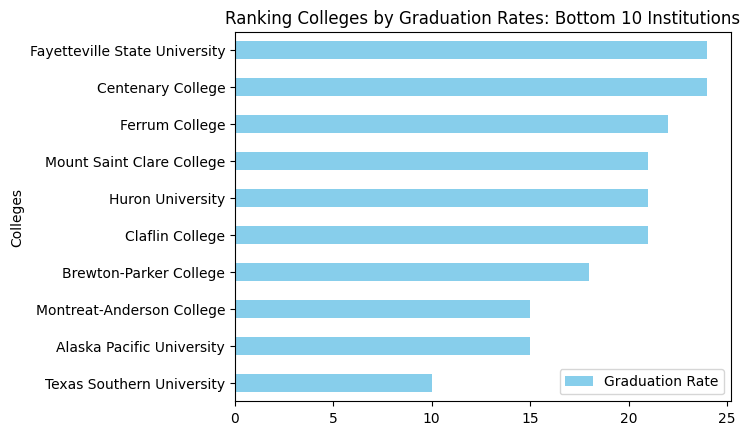

In [ ]:
plt.figure(figsize=(5,5))
df_graduation_top = df.nsmallest(10, 'Graduation Rate').set_index('Colleges').plot.barh(y='Graduation Rate', color= 'skyblue')
plt.title('Ranking Colleges by Graduation Rates: Bottom 10 Institutions')
plt.show()

**Top 10 Colleges with the Highest Acceptance Rates**

<Figure size 1500x1500 with 0 Axes>

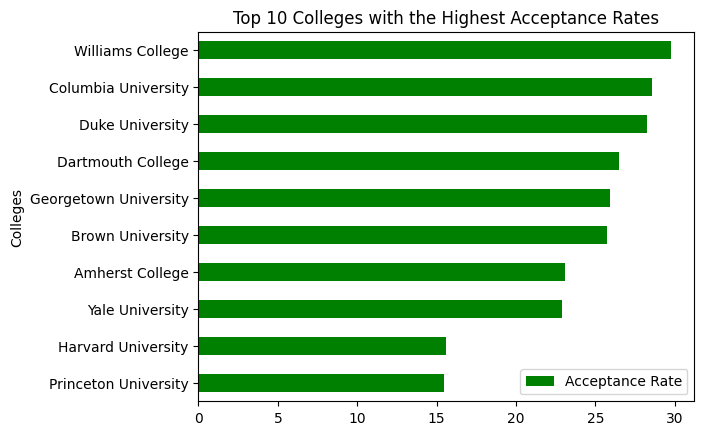

In [ ]:
plt.figure(figsize=(15,15))
df_graduation_top = df.nsmallest(10, 'Acceptance Rate').set_index('Colleges').plot.barh(y='Acceptance Rate', color = 'green', legend = 'False')
plt.title('Top 10 Colleges with the Highest Acceptance Rates')
plt.show()

**Bottom 10 Colleges based on Books, Room Board, and Personal Expenses**
High Expenses : do not go

<Figure size 1500x800 with 0 Axes>

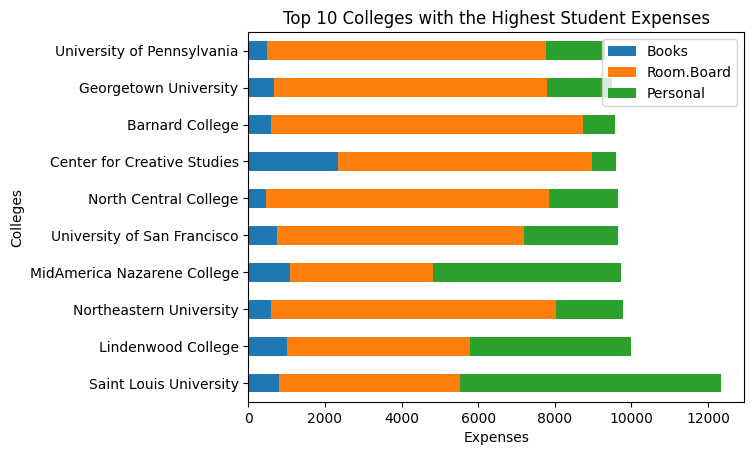

In [ ]:
df_top = df[['Colleges', 'Books', 'Room.Board', 'Personal']].copy()
df_top['Total'] = df_top[['Books', 'Room.Board', 'Personal']].sum(axis=1)
df_top = df_top.nlargest(10, 'Total').set_index('Colleges')

plt.figure(figsize=(15, 8))
df_top[['Books', 'Room.Board', 'Personal']].plot(kind='barh', stacked=True)
plt.title('Top 10 Colleges with the Highest Student Expenses')
plt.xlabel('Expenses')
plt.ylabel('Colleges')
#plt.legend('upper right')
plt.show()

**Highest Student-Faculty Ratio**

<Figure size 1500x1500 with 0 Axes>

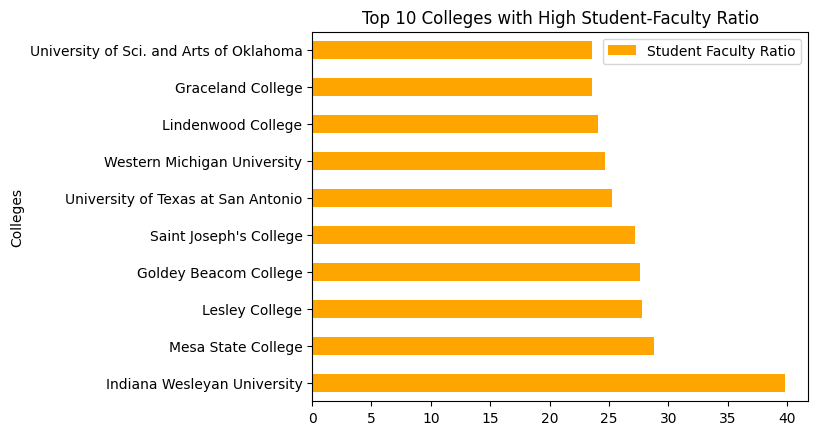

In [ ]:
plt.figure(figsize=(15,15))
df_graduation_top = df.nlargest(10, 'Student Faculty Ratio').set_index('Colleges').plot.barh(y='Student Faculty Ratio', color = 'orange', legend = 'False')
plt.title('Top 10 Colleges with High Student-Faculty Ratio')
plt.show()

**Top 25 Colleges with a Low Percentage of Professors Holding PhD**

<Figure size 1500x1500 with 0 Axes>

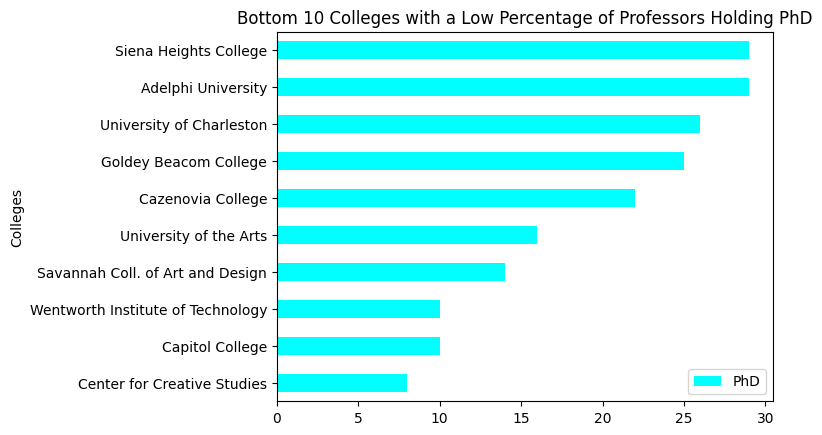

In [ ]:
plt.figure(figsize=(15,15))
df_graduation_top = df.nsmallest(10, 'PhD').set_index('Colleges').plot.barh(y='PhD', color = 'cyan', legend = 'False')
plt.title('Bottom 10 Colleges with a Low Percentage of Professors Holding PhD')
plt.show()

<Figure size 1500x1500 with 0 Axes>

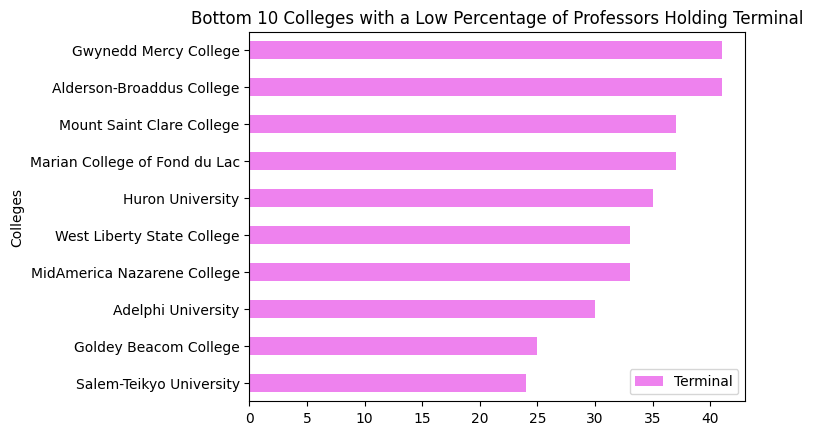

In [ ]:
plt.figure(figsize=(15,15))
df_graduation_top = df.nsmallest(10, 'Terminal').set_index('Colleges').plot.barh(y='Terminal', color = 'violet', legend = 'False')
plt.title('Bottom 10 Colleges with a Low Percentage of Professors Holding Terminal')
plt.show()

**Top 10% of High School Class Enrollment in Universities**

<Figure size 1500x1500 with 0 Axes>

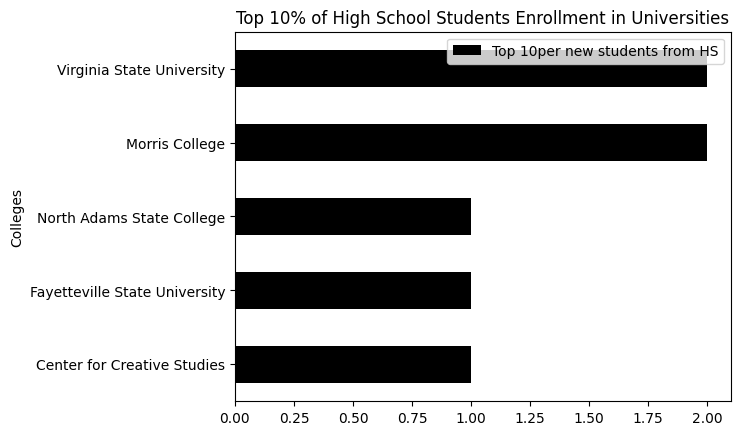

In [ ]:
plt.figure(figsize=(15,15))
df_graduation_top = df.nsmallest(5, 'Top 10per new students from HS').set_index('Colleges').plot.barh(y='Top 10per new students from HS', color = 'black', legend = 'False')
plt.title('Top 10% of High School Students Enrollment in Universities')
plt.show()

Text(0.5, 1.0, 'Room.Board vs Personal Expenses')

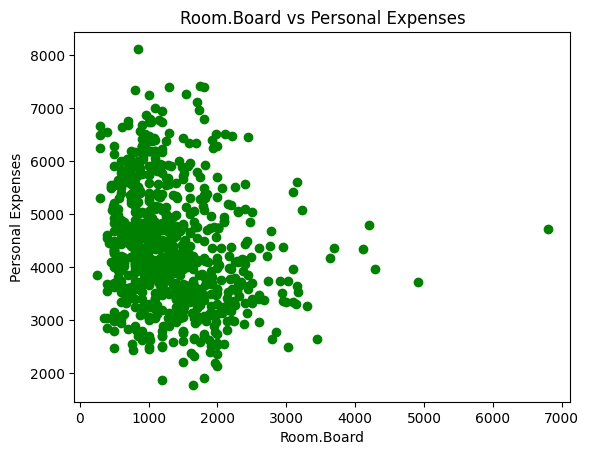

In [ ]:
# Create a scatter plot
x = df['Personal']
y = df['Room.Board']

# Create a scatter plot with multiple colors
plt.scatter(x, y, c= 'green')
plt.xlabel('Room.Board')
plt.ylabel('Personal Expenses')
plt.title('Room.Board vs Personal Expenses')

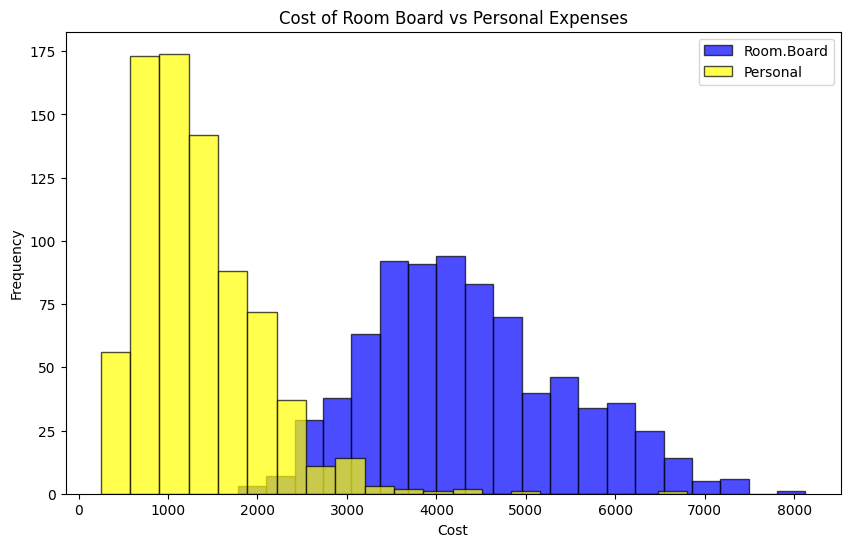

In [ ]:
# Create a histogram for 'Room.Board' and 'Personal' on the same plot
plt.figure(figsize=(10, 6))

plt.hist(df['Room.Board'], bins=20, alpha=0.7, color='blue', edgecolor='black', label='Room.Board')
plt.hist(df['Personal'], bins=20, alpha=0.7, color='yellow', edgecolor='black', label='Personal')

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Cost of Room Board vs Personal Expenses')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
selected_colleges = df[df['Private'] == 'Yes']
selected_colleges
selected_colleges1 = df[df['Private'] == 'No']
selected_colleges1

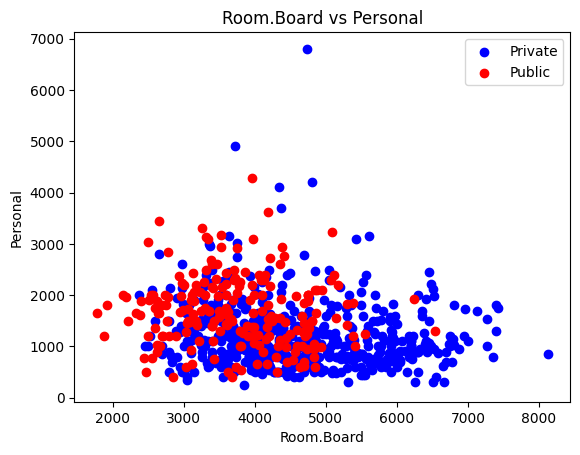

In [ ]:
# Plot for Private Colleges
plt.scatter(selected_colleges['Room.Board'], selected_colleges['Personal'], color='blue', label='Private')

# Plot for Public Colleges
plt.scatter(selected_colleges1['Room.Board'], selected_colleges1['Personal'], color='red', label='Public')

# Add labels and title
plt.xlabel('Room.Board')
plt.ylabel('Personal')
plt.title('Room.Board vs Personal Expenses')

# Add legend
plt.legend()

# Show the plot
plt.show()


**Average Books Cost for Private and Public Colleges**

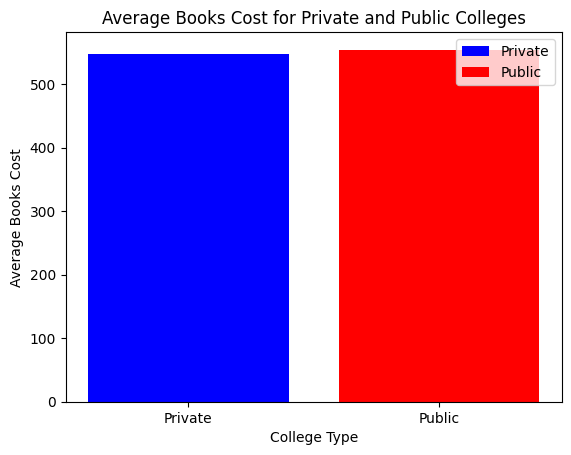

In [ ]:
# Bar chart for Private Colleges
plt.bar('Private', selected_colleges['Books'].mean(), color='blue', label='Private')

# Bar chart for Public Colleges
plt.bar('Public', selected_colleges1['Books'].mean(), color='red', label='Public')

# Add labels and title
plt.xlabel('College Type')
plt.ylabel('Average Books Cost')
plt.title('Average Books Cost for Private and Public Colleges')

# Add legend
plt.legend()

# Show the plot
plt.show()


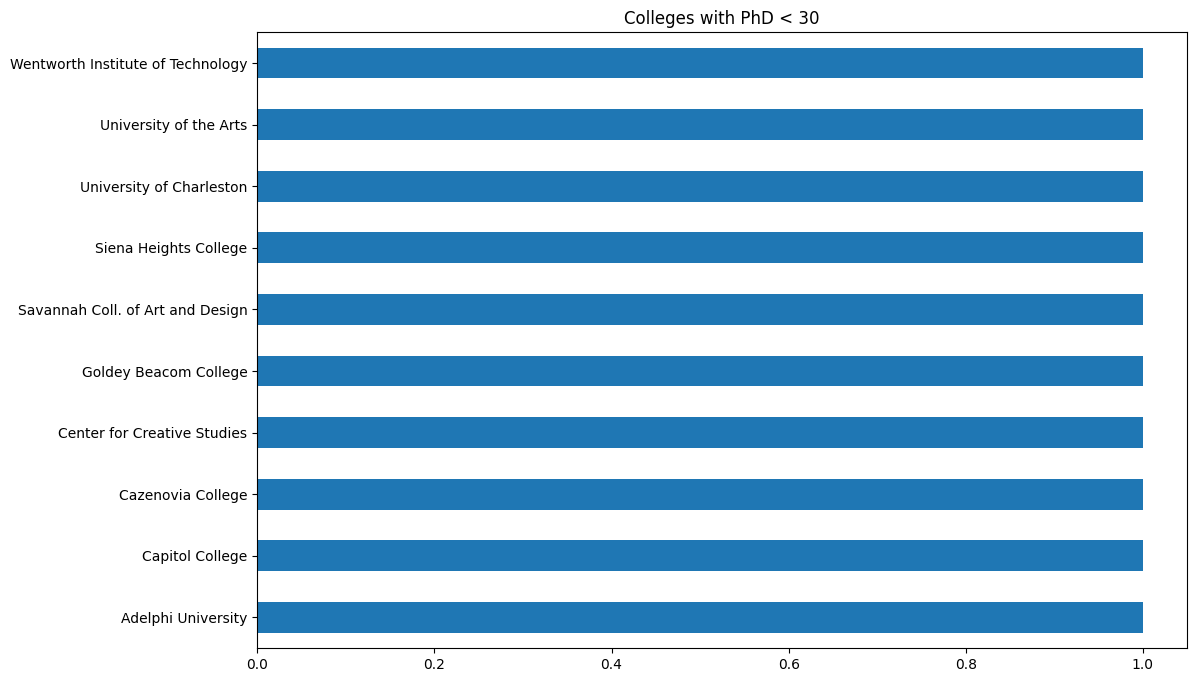

In [ ]:
# Define a condition
condition = df['PhD'] < 30


phd = df[condition]

#plot
plt.figure(figsize=(12,8))
 #Plot the horizontal bar chart for the 'Colleges' column
phd['Colleges'].value_counts().plot(kind='barh', title='Colleges with PhD < 30')

# Show the plot
plt.show()


<Figure size 1500x800 with 0 Axes>

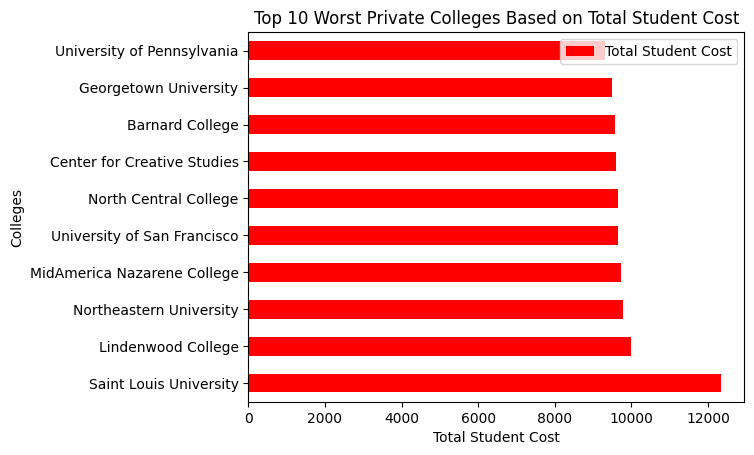

In [ ]:
# Create a new DataFrame with relevant columns
df_worst = df[['Colleges', 'Total Student Cost', 'Private']].copy()

# Sort by Total Student Cost in descending order
df_worst = df_worst.sort_values(by='Total Student Cost', ascending=False)

# Separate private and public colleges
worst_private = df_worst[df_worst['Private'] == 'Yes'].head(10)
worst_public = df_worst[df_worst['Private'] == 'No'].head(10)

# Plot worst private colleges
plt.figure(figsize=(15, 8))
worst_private.plot(kind='barh', x='Colleges', y='Total Student Cost', stacked=True, color='red')
plt.title('Top 10 Worst Private Colleges Based on Total Student Cost')
plt.xlabel('Total Student Cost')
plt.ylabel('Colleges')
plt.show()

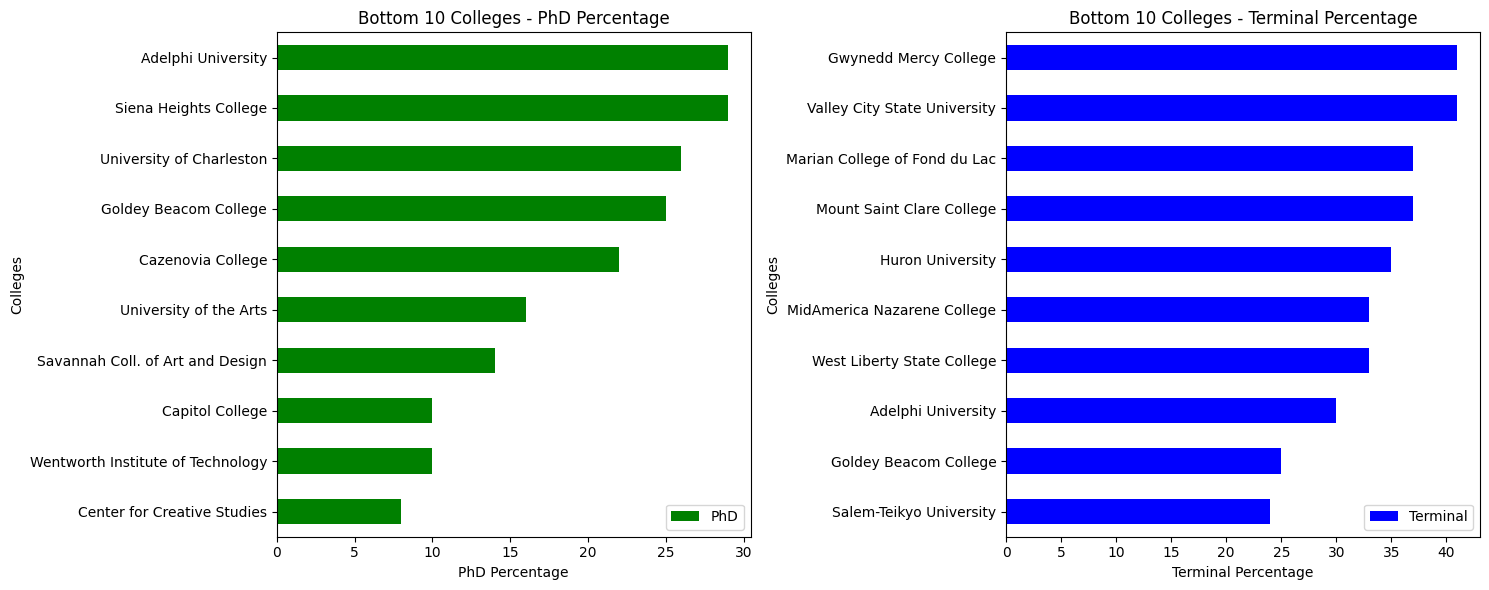

In [ ]:
#import matplotlib.pyplot as plt

# Select relevant columns
df_phd_terminal = df[['Colleges', 'PhD', 'Terminal']].copy()

# Sort DataFrame by PhD in descending order and select the top 10
top_10_phd = df_phd_terminal.sort_values(by='PhD', ascending=True).head(10)

# Sort DataFrame by Terminal in descending order and select the top 10
top_10_terminal = df_phd_terminal.sort_values(by='Terminal', ascending=True).head(10)

# Create subplots with two axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the top 10 'PhD' colleges
top_10_phd.plot(kind='barh', x='Colleges', y='PhD', ax=axes[0], color='green')
axes[0].set_title('Bottom 10 Colleges - PhD Percentage')
axes[0].set_xlabel('PhD Percentage')
axes[0].set_ylabel('Colleges')

# Plot the top 10 'Terminal' colleges
top_10_terminal.plot(kind='barh', x='Colleges', y='Terminal', ax=axes[1], color='blue')
axes[1].set_title('Bottom 10 Colleges - Terminal Percentage')
axes[1].set_xlabel('Terminal Percentage')
axes[1].set_ylabel('Colleges')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
